In [43]:
import yaml
import pandas as pd
from backend.utils.data_preprocessor import DataPreprocessor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "1h"
training_file_path: str = f"../data/twelvedata/train (1h).csv"
testing_file_path: str = f"../data/twelvedata/feature time series ({interval})/TSLA_feature_time_series.csv"

training_df: pd.DataFrame = pd.read_csv(training_file_path)
testing_df: pd.DataFrame = pd.read_csv(testing_file_path)


In [34]:
training_preprocessor = DataPreprocessor(training_df)
testing_preprocessor = DataPreprocessor(testing_df)

X_train: [[[float]]] = training_preprocessor.target_data_batched
X_test: [[[float]]] = testing_preprocessor.target_data_batched
y_test: [float] = testing_preprocessor.target_data_batched_labels


In [35]:
scaler = MinMaxScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
X_train_fitted_reshaped = scaler.fit(X_train_reshaped)

X_test_scaled_reshaped = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)

In [36]:
print("Testing Dataset shape:", testing_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)
# %run ../tests/data_preprocessor_validator.py
testing_preprocessor.target_data

Testing Dataset shape: (4970, 32)
Testing Dataset as time series batches: (4967, 1, 33) (4967,)


open     high      low    close    volume  percent_b  \
datetime                                                                       
2021-03-15 12:30:00   701.07   707.80   700.01   701.59   2682175   0.783952   
2021-03-15 13:30:00   701.70   706.99   701.40   705.66   2333052   0.864043   
2021-03-15 14:30:00   705.69   709.87   702.65   703.93   2563231   0.814769   
2021-03-15 15:30:00   703.85   708.30   703.21   707.94   1825855   0.892120   
2021-03-16 09:30:00   702.30   707.77   694.37   706.48   6979817   0.814834   
2021-03-16 10:30:00   706.50   707.20   700.24   703.40   3197182   0.705945   
2021-03-16 11:30:00   703.31   704.63   690.69   693.67   3550931   0.431141   
2021-03-16 12:30:00   694.02   698.80   692.00   694.89   3111794   0.462940   
2021-03-16 13:30:00   695.00   695.03   681.81   682.00   4161999   0.141520   
2021-03-16 14:30:00   682.01   684.91   671.00   678.56   7088231   0.103644   
2021-03-16 15:30:00   678.83   682.78   675.88   676.87   2659721   0.053173   
2021-03-17 09:30:00   655.80   683.63   651.01   678.98  10279078   0.117143   
2021-03-17 10:30:00   678.87   681.85   669.28   676.17   4746255   0.097627   
2021-03-17 11:30:00   676.09   676.09   663.22   669.57   3806643   0.017112   
2021-03-17 12:30:00   669.50   677.00   667.26   674.51   2633847   0.146490   
2021-03-17 13:30:00   674.58   695.85   670.03   683.50   5938816   0.335714   
2021-03-17 14:30:00   684.00   703.73   682.32   698.49   7126574   0.630878   
2021-03-17 15:30:00   698.78   702.00   694.31   701.76   3039586   0.700030   
2021-03-18 09:30:00   686.35   689.23   672.71   680.73   7407978   0.295935   
2021-03-18 10:30:00   680.51   684.88   675.12   677.40   3964729   0.255505   
2021-03-18 11:30:00   677.50   680.39   673.00   674.04   3614860   0.219539   
2021-03-18 12:30:00   673.74   674.98   667.32   672.87   3607838   0.224095   
2021-03-18 13:30:00   672.87   674.00   664.79   664.95   2956082   0.112202   
2021-03-18 14:30:00   664.95   668.77   658.00   660.63   4378400   0.070186   
2021-03-18 15:30:00   660.80   661.99   652.00   653.16   3423815  -0.013267   
2021-03-19 09:30:00   644.52   654.00   624.62   636.25  12581705  -0.171160   
2021-03-19 10:30:00   636.54   654.24   631.48   644.00   7449745   0.031663   
2021-03-19 11:30:00   644.00   651.80   642.29   644.79   4236781   0.094415   
2021-03-19 12:30:00   644.40   647.95   640.40   647.21   2707823   0.170141   
2021-03-19 13:30:00   647.09   653.06   645.25   649.62   3304988   0.233090   
2021-03-19 14:30:00   649.45   655.55   647.68   649.33   3694651   0.253580   
2021-03-19 15:30:00   649.50   657.22   648.13   655.18   2914792   0.351896   
2021-03-22 09:30:00   685.57   694.39   673.08   677.81  10841200   0.668602   
2021-03-22 10:30:00   677.96   693.99   675.50   690.81   5676254   0.821478   
2021-03-22 11:30:00   690.89   698.74   686.23   697.87   5178430   0.877430   
2021-03-22 12:30:00   697.99   699.62   689.37   690.30   4113107   0.773007   
2021-03-22 13:30:00   690.38   696.00   690.18   691.90   2746059   0.803787   
2021-03-22 14:30:00   691.88   693.28   683.50   684.00   2832051   0.728242   
2021-03-22 15:30:00   683.92   685.98   668.75   670.00   4185683   0.546580   
2021-03-23 09:30:00   675.57   677.80   665.22   670.51   7768657   0.558768   
2021-03-23 10:30:00   670.39   675.10   663.43   670.22   3612084   0.557600   
2021-03-23 11:30:00   670.70   672.45   665.40   667.21         0   0.519817   
2021-03-23 12:30:00   667.28   674.35   666.50   669.85         0   0.553122   
2021-03-23 13:30:00   669.80   669.81   662.23   667.75         0   0.518988   
2021-03-23 14:30:00   667.96   670.83   657.51   660.00         0   0.405120   
2021-03-23 15:30:00   660.13   663.01   658.30   663.01         0   0.422600   
2021-03-24 09:30:00   667.45   668.02   651.00   654.61   8145531   0.277369   
2021-03-24 10:30:00   654.19   666.21   651.50   664.60   5557675   0.415564   
2021-03-24 11:30:00   66

In [37]:
from keras.models import load_model
from backend.utils.model_evaluator import ModelEvaluator

model_path: str = "../models/saved models/trained_StockTrendLSTM_model.keras"
model = load_model(model_path)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.1).astype(int)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df

156/156 [==============================] - 1s 1ms/step


Metric     Score
0       Loss  0.536304
1   Accuracy  0.530904
2  Precision  0.517750
3     Recall  0.997201
4    F1Score  0.681607
5    ROC AUC  0.527595

In [42]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

Actual  Predicted  Predicted_Prob
0          1          1        0.621574
1          0          1        0.395072
2          1          1        0.613443
3          1          1        0.798185
4          0          1        0.163936
5          0          1        0.143101
6          0          1        0.723711
7          0          1        0.173125
8          0          1        0.324649
9          1          1        0.429336
10         1          1        0.914749
11         0          1        0.152101
12         0          1        0.157202
13         1          1        0.823464
14         1          1        0.767657
15         1          1        0.715852
16         0          1        0.580933
17         0          0        0.097024
18         0          1        0.267582
19         0          1        0.235706
20         0          1        0.276400
21         0          1        0.281908
22         0          1        0.317450
23         0          1        0.338742
24         0          1        0.124455
25         1          1        0.887073
26         1          1        0.674665
27         1          1        0.533438
28         1          1        0.670143
29         1          1        0.343938
30         1          1        0.634935
31         1          1        0.279862
32         1          1        0.833945
33         0          1        0.815668
34         0          1        0.295196
35         0          1        0.714783
36         0          1        0.327852
37         0          1        0.386599
38         0          1        0.217400
39         0          1        0.206180
40         0          1        0.235118
41         1          1        0.821795
42         0          1        0.242711
43         0          1        0.292285
44         0          1        0.597407
45         0          0        0.089203
46         1          1        0.812836
47         0          1        0.201703
48         0          1        0.171627
49         0          1        0.344318
50         0          1        0.318375
51         0          1        0.361659
52         1          1        0.860954
53         1          1        0.169522
54         1          1        0.865580
55         0          1        0.223512
56         1          1        0.231727
57         1          1        0.758362
58         0          1        0.635610
59         0          0        0.077565
60         0          1        0.157524
61         0          1        0.178461
62         0          1        0.330389
63         0          1        0.271723
64         1          1        0.660242
65         0          1        0.667791
66         0          0        0.058334
67         1          1        0.749732
68         1          1        0.642696
69         1          1        0.709517
70         1          1        0.528989
71         0          1        0.606875
72         0          1        0.607960
73         1          1        0.674465
74         1          1        0.901596
75         0          1        0.809185
76         0          1        0.181358
77         1          1        0.353295
78         1          1        0.778782
79         1          1        0.658930
80         1          1        0.868166
81         1          1        0.836133
82         1          1        0.175482
83         1          1        0.821471
84         1          1        0.381778
85         1          1        0.679485
86         1          1        0.416687
87         0          1        0.234219
88         0          1        0.176848
89         0          1        0.796483
90         0          1        0.213214
91         0          1        0.708333
92         1          1        0.295354
93         1          1        0.382469
94         0          1        0.312304
95         0          1        0.305653
96         0          1        0.263446
97         1          1        0.742500
98         1          1        0.762779
99    

In [39]:
last_entry = X_test_scaled[-1]
ground_truth_label = y_test[-1]

reshaped_last_entry = last_entry.reshape((1, X_test.shape[-2], X_test.shape[-1]))
y_pred_prob_single = model.predict(reshaped_last_entry)
y_pred_single = (y_pred_prob_single > 0.5).astype(int)


print("Ground Truth Label:", ground_truth_label)
print("Predicted Probability:", y_pred_prob_single[0, 0])
print("Predicted Class:", y_pred_single[0, 0])

1/1 [==============================] - 0s 24ms/step
Ground Truth Label: 0
Predicted Probability: 0.59884334
Predicted Class: 1


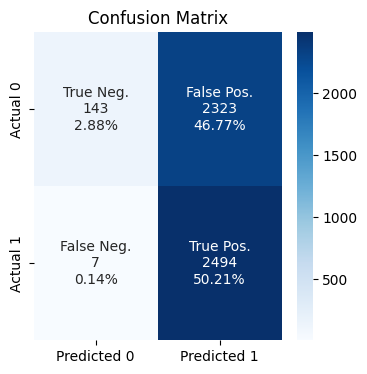

In [40]:
from backend.utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [41]:
from backend.utils.visualizing_service import plot_correlation_heatmap
# plot_correlation_heatmap(testing_preprocessor.target_data)
